In [26]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth
import toml
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

In [1]:


config = toml.load("conf.toml")
redirectUrl = "https://example.com/callback"
scope = " ".join(
    [
        "user-read-currently-playing",
        "user-read-playback-state",
        "playlist-modify-private",
        "user-modify-playback-state",
        "user-library-read",
        "playlist-modify-public",
        "app-remote-control",
    ]
)
clientId = config["CLIENT_ID"]
clientSecret = config["CLIENT_SECRET"]

user = spotipy.Spotify(
    auth_manager=SpotifyOAuth(
        client_id=clientId,
        client_secret=clientSecret,
        redirect_uri=redirectUrl,
        scope=scope,
    )
)

sp = spotipy.Spotify(
    client_credentials_manager=SpotifyClientCredentials(
        client_id=clientId, client_secret=clientSecret
    )
)

In [19]:
artist_id = '01WBZfiMaLls0KgUFdbgKf'
albums = sp.artist_albums(artist_id)
track_ids = []
name_dict = {}
for a in albums["items"]:
    album_id = a["id"]
    track = sp.album_tracks(album_id)["items"][0]
    name = track["name"]
    track_id = track["id"]
    track_ids.append(track_id)
    name_dict[track_id] = name

In [34]:
songs = sp.audio_features(track_ids)

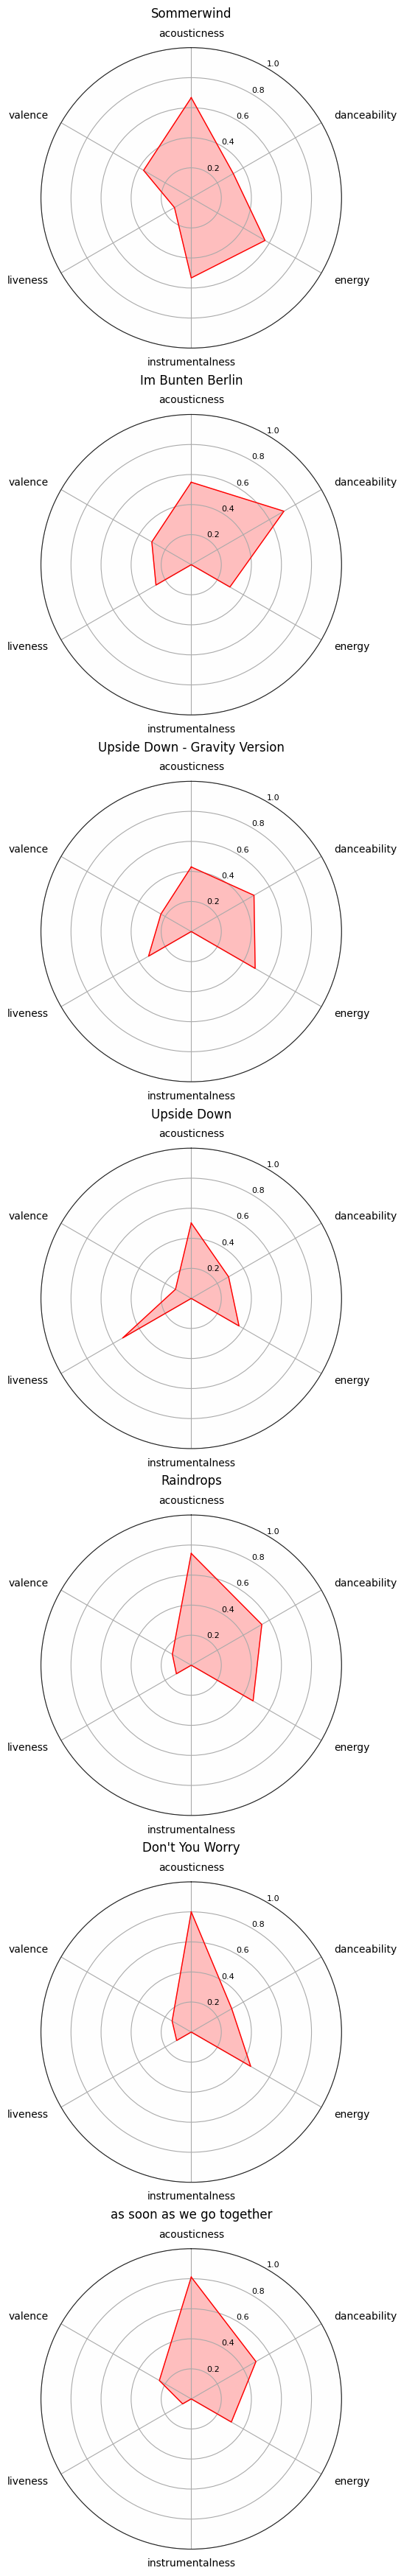

In [43]:
def radar_plot(values, labels, ax, cmp_values=None, title=""):
    ## Radar Plots
    # https://www.pythoncharts.com/matplotlib/radar-charts/

    n_categories = len(labels)
    angles = np.linspace(0, 2*np.pi, n_categories, endpoint=False)

    # append first value to close the circle
    angles = np.append(angles, 0.)
    values = np.append(values, values[0])

    if cmp_values:
        cmp_values = np.append(cmp_values, cmp_values[0])

        ax.plot(angles, cmp_values, color='blue', alpha=0.5)
        ax.fill(angles, cmp_values, color='blue', alpha=0.15)
    # Draw the outline of our data.
    ax.plot(angles, values, color='red', linewidth=1)
    # Fill it in.
    ax.fill(angles, values, color='red', alpha=0.25)

    # Fix axis to go in the right order and start at 12 o'clock.
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each angle and label.
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    # Go through labels and adjust alignment based on where
    # it is in the circle.
    for label, angle in zip(ax.get_xticklabels(), angles):
      if angle in (0, np.pi):
        label.set_horizontalalignment('center')
      elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
      else:
        label.set_horizontalalignment('right')

    # Ensure radar goes from 0 to 100.
    ax.set_ylim(0, 1)
    # You can also set gridlines manually like this:
    # ax.set_rgrids([20, 40, 60, 80, 100])

    # Set position of y-labels (0-100) to be in the middle
    # of the first two axes.
    ax.set_rlabel_position(180 / n_categories)

    # Add some custom styling.

    # Make the y-axis (0-100) labels smaller.
    ax.tick_params(axis='y', labelsize=8)
    # Change the color of the circular gridlines.
    ax.grid(color='#AAAAAA')
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('#222222')
    # Change the background color inside the circle itself.
    ax.set_facecolor('#FAFAFA10')

    # Lastly, give the chart a title and give it some
    # padding above the "Acceleration" label.
    ax.set_title(title, y=1.08)


features = [
    "acousticness",
    'danceability',
    'energy',
    'instrumentalness',
    'liveness',
#    'loudness',
#    'speechiness',
    'valence'
]

fig, axs = plt.subplots(len(songs), 1, figsize=(2*5, len(songs)*5) ,subplot_kw=dict(polar=True))
for song, ax in zip(songs, axs.flatten()):
    title = name_dict[song['id']]
    values = [song[f] for f in features]

    radar_plot(values, features, ax, title=title)

fig.tight_layout()
    


In [42]:
for f in features:
    mean = np.mean([s[f] for s in songs])
    print(f"{f:20} \t {mean}")

acousticness         	 0.6432857142857143
danceability         	 0.45057142857142857
energy               	 0.4231428571428571
instrumentalness     	 0.07617074571428573
liveness             	 0.22101428571428575
speechiness          	 0.040914285714285716
valence              	 0.22285714285714286


In [ ]:
for f in feature:
    sorted_songs = sorted(songs, key=lambda x: x[f])
    

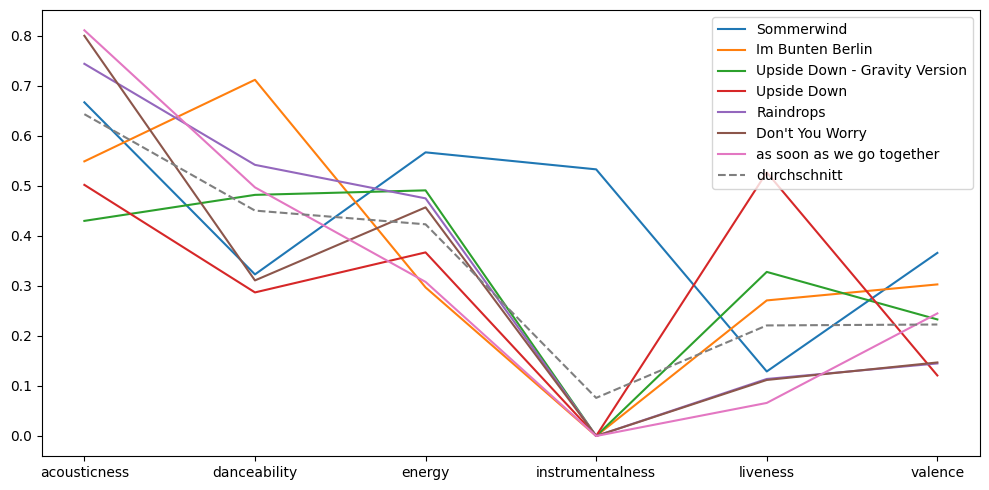

In [52]:
fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(10, 5))

for song in songs:
    values = [song[f] for f in features]
    title = name_dict[song['id']]
    axs.plot(features, values, label=title)
    
means = []
for f in features:
    means.append(np.mean([s[f] for s in songs]))
axs.plot(features, means, label="durchschnitt", linestyle="--")
axs.legend()

In [33]:
songs_analysis = []
for id in track_ids:
    songs_analysis.append(sp.audio_analysis(id))

In [5]:
id = song_ids[0]
sp.track(id)

{'album': {'album_type': 'single',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/01WBZfiMaLls0KgUFdbgKf'},
    'href': 'https://api.spotify.com/v1/artists/01WBZfiMaLls0KgUFdbgKf',
    'id': '01WBZfiMaLls0KgUFdbgKf',
    'name': 'Theresa Zanon',
    'type': 'artist',
    'uri': 'spotify:artist:01WBZfiMaLls0KgUFdbgKf'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BY',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'ET',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   'HN',
   'HR